# CARTHE dt distribution

In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt



In [2]:
carthe_dir = '/Users/mdemol/DATA_SWOT/carthe_drifter_data/csv'
CSWOT_files = sorted(glob(os.path.join(carthe_dir, "*carthe_CSWOT_ok.csv")))
BIOSWOT_files = sorted(glob(os.path.join(carthe_dir, "*carthe_BIOSWOT_ok.csv")))


In [3]:
df1= pd.read_csv(CSWOT_files[0], parse_dates=[1]).rename(columns=dict(DeviceName="id", DeviceDateTime="time", 
                               Latitude="lat", Longitude="lon"))
df2= pd.read_csv(CSWOT_files[1], parse_dates=[1]).rename(columns=dict(DeviceName="id", DeviceDateTime="time", 
                               Latitude="lat", Longitude="lon"))
print(df1.time.min(), df1.time.max())
print(df2.time.min(), df2.time.max())

IndexError: list index out of range

In [4]:
def read_carthe_drifters(file):
    df = pd.read_csv(file, parse_dates=[1])
    df = (df
          .rename(columns=dict(DeviceName="id", DeviceDateTime="time", 
                               Latitude="lat", Longitude="lon"))
          .sort_values("id")
         )
    df = df.set_index("id")
    return df

In [5]:
# Create all data csv
df = pd.concat([read_carthe_drifters(csv) for csv in CSWOT_files])
df.to_csv(carthe_dir + "/all_CSWOT_ok.csv")
df = pd.concat([read_carthe_drifters(csv) for csv in BIOSWOT_files])
df.to_csv(carthe_dir + "/all_BIOSWOT_ok.csv")

# IMPORT data

In [6]:
files = [carthe_dir + "/all_BIOSWOT_ok.csv", carthe_dir + "/all_CSWOT_ok.csv"]
df = pd.concat([pd.read_csv(csv, parse_dates=[1]) for csv in files]).reset_index().set_index('time').sort_values('time')

In [7]:
ids = list(df.id.unique())

print("drifter id's in data file:")
print(ids, len(ids))

drifter id's in data file:
['0-4388620', '0-4351945', '0-4388627', '0-4351296', '0-4388675', '0-4388557', '0-4388581', '0-4388635', '0-4388605', '0-4388608', '0-4388554', '0-4388599', '0-4351906', '0-4351902', '0-4356534', '0-4356456', '0-4367707', '0-4367310', '0-4367706', '0-4367307', '0-4388593', '0-4388589', '0-4388625', '0-4388553', '0-4388634', '0-4388636', '0-4388559', '0-4388587', '0-4388632', '0-4388640', '0-4388923', '0-4389009', '0-4388938', '0-4388926', '0-4389467', '0-4389458', '0-4389089', '0-4388942', '0-4388943', '0-4351904', '0-4351908', '0-4352044', '0-4351896', '0-4352175', '0-4352049', '0-4350129', '0-4350128', '0-4352178', '0-4350125', '0-4389439'] 50


In [8]:
df = df[df.GpsQuality!=1]

In [9]:
def compute_dt(df) : 
    df = df.copy()
    t = df.index.to_series()
    dt = t.diff()/ pd.Timedelta("1s")
    dt.index = df.index
    df.loc[:, "dt"] = dt
    return df
df = df.groupby('id').apply(compute_dt)

/var/folders/fn/z858c2qj1lz65xr0z5mdvbf40000gp/T/ipykernel_9473/3044771973.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('id').apply(compute_dt)


In [10]:
df_=df[df.id==ids[0]]
df_

,index,id,BatteryStatus,CommId,GPS Confidence,GPS Fail Counter,GpsQuality,lat,lon,dt
time,,,,,,,,,,
2023-04-12 00:00:24,28470,0-4388620,GOOD,0-4388620,0,0,3,41.330212,4.700410,NaN
2023-04-12 00:05:17,28331,0-4388620,GOOD,0-4388620,0,0,3,41.329429,4.701183,293.0
2023-04-12 00:10:16,28322,0-4388620,GOOD,0-4388620,0,0,3,41.328753,4.702127,299.0
2023-04-12 00:15:29,28338,0-4388620,GOOD,0-4388620,0,0,3,41.328099,4.703050,313.0
2023-04-12 00:20:17,28358,0-4388620,GOOD,0-4388620,0,0,3,41.327423,4.703994,288.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-30 16:23:46,90502,0-4388620,LOW,0-4388620,0,0,3,39.896958,5.948775,326.0
2023-04-30 16:28:08,90500,0-4388620,LOW,0-4388620,0,0,3,39.896550,5.949869,262.0
2023-04-30 16:32:47,90489,0-4388620,LOW,0-4388620,0,0,3,39.896014,5.950942,279.0


# dt distribution
## Some values

In [11]:
print(f'mean : {df.dt.mean()}\n' +
      f'std : {df.dt.std()}\n'+
      f'10% : {df.dt.quantile(0.1)}\n'+
      f'50% : {df.dt.quantile(0.5)}\n'+ 
      f'90% : {df.dt.quantile(0.9)}\n'+
      f'99% : {df.dt.quantile(0.99)}\n'+
      f'min : {df.dt.min()}\n'+
      f'max : {df.dt.max()}\n')

mean : 462.47203370633804
std : 4237.4237287007145
10% : 293.0
50% : 301.0
90% : 603.0
99% : 2102.0
min : 0.0
max : 923835.0



## Global distributions

Pics sur multiples de 300 secondes avec de moins en moins d'énergie. 

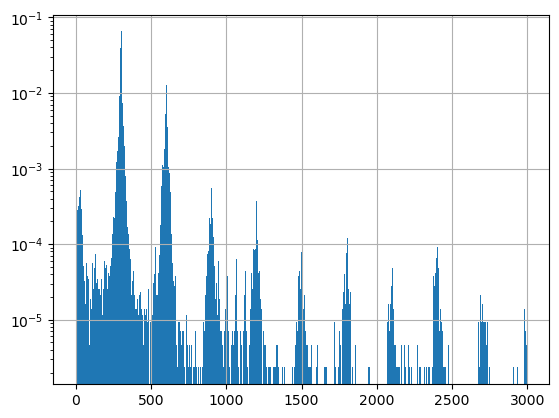

In [9]:
df.dt.hist(bins=np.arange(0,3000,5), density=True)
plt.yscale('log')

## Same for all trajectories ? -

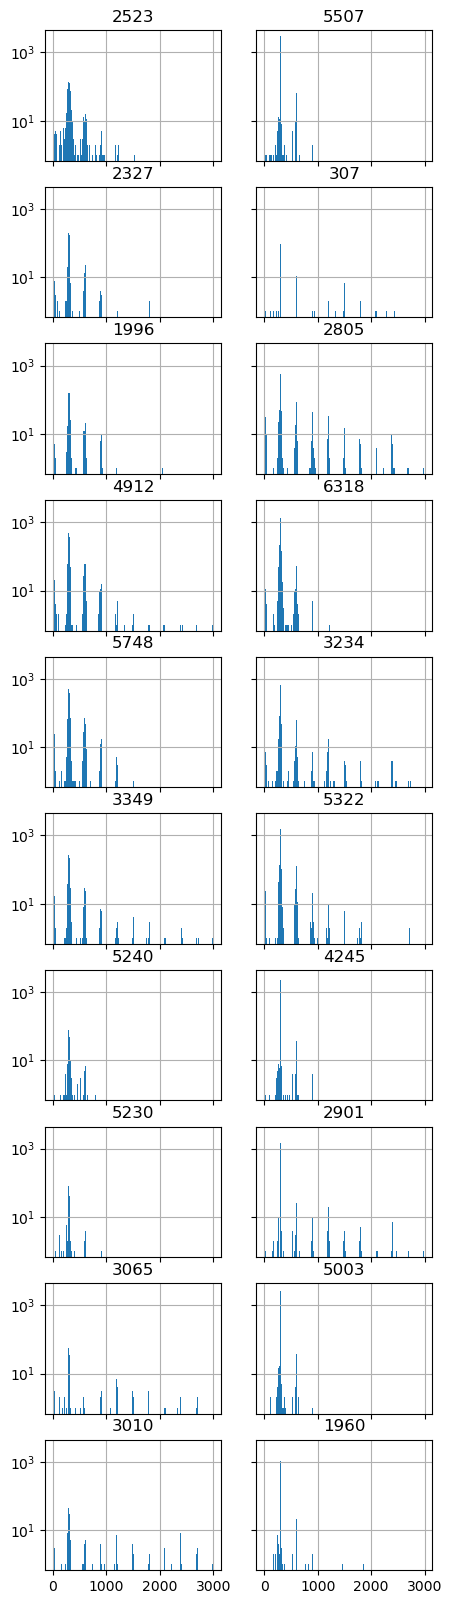

In [39]:
fig, ax =plt.subplots(10,2,sharey=True, sharex=True, figsize=(5,20))
ax=ax.flatten()
for i in range(0,20):
    df_=df[df.id==ids[i]]
    df_.dt.hist(bins=np.arange(0,3000,5), ax=ax[i])
    ax[i].set_yscale('log')
    ax[i].set_title(len(df_))
    

## Shape of the different pics? -

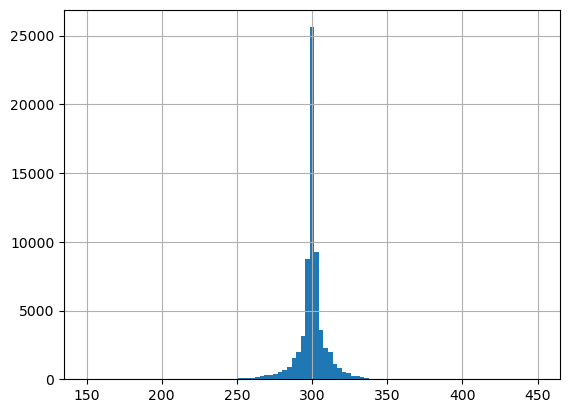

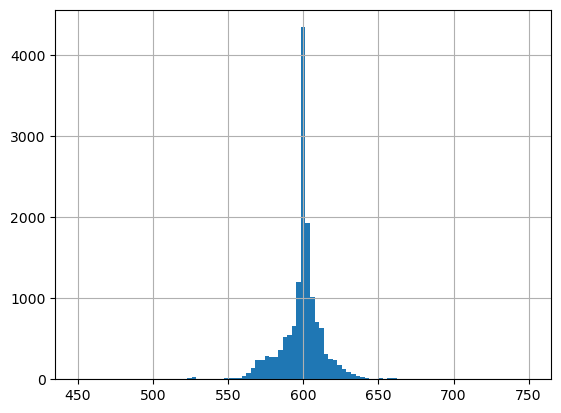

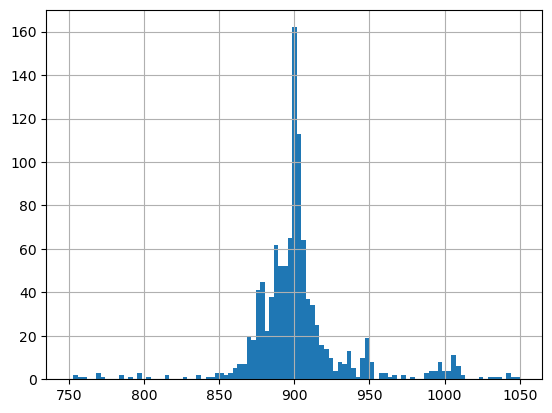

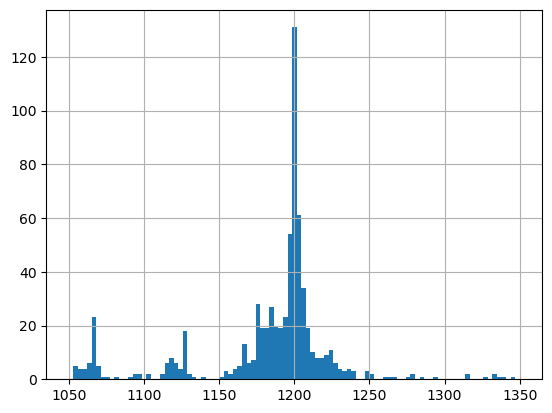

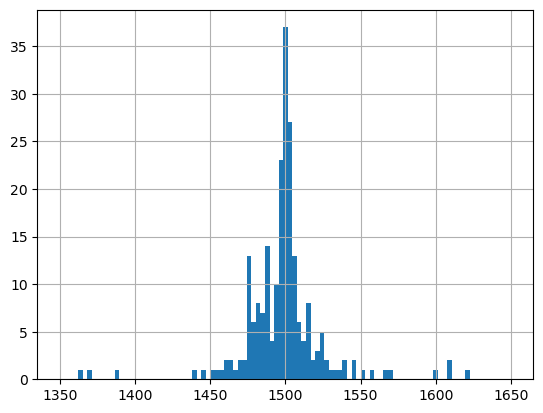

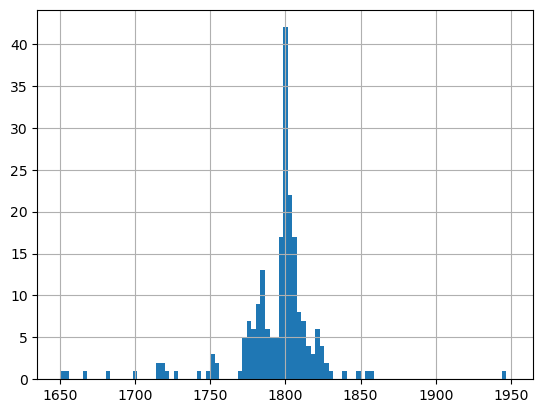

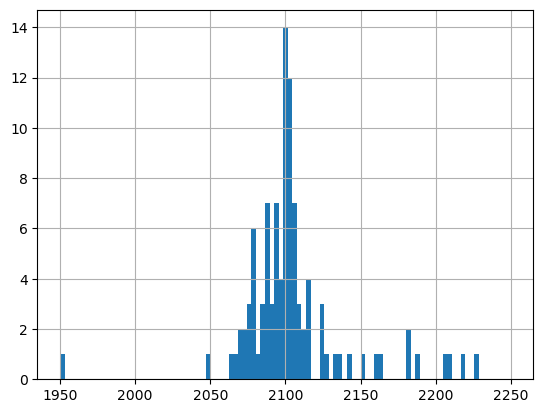

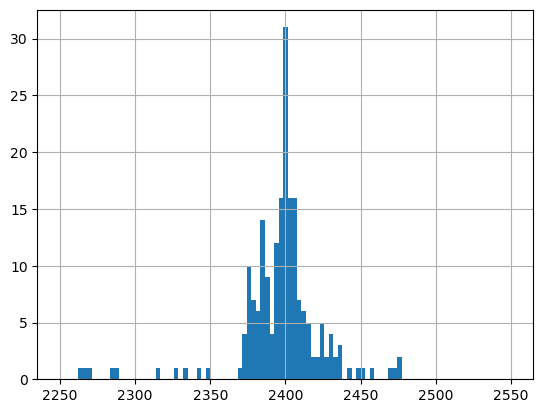

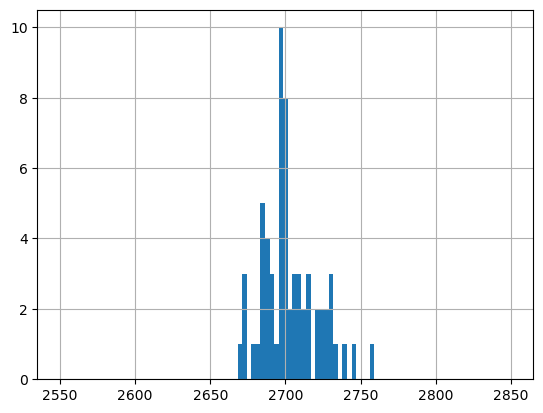

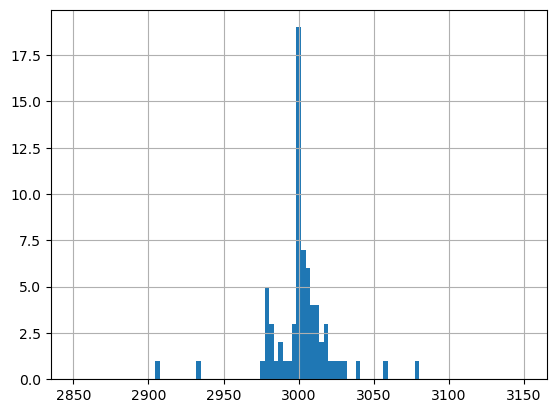

In [ ]:
for i in range(0, 10) : 
    fig, ax=plt.subplots(1,1)
    df.dt.hist(bins=np.linspace(150 + 300*i, 450+300*i, 100),ax=ax)

# Split dt and gap

In [16]:
dt_

id
0-4350125    209.0
0-4350125    309.0
0-4350125    291.0
0-4350125    299.0
0-4350125    304.0
             ...  
0-4389467    601.0
0-4389467    636.0
0-4389467    565.0
0-4389467    610.0
0-4389467    625.0
Name: dt, Length: 110365, dtype: float64

In [28]:
dt_ = df.sort_values(['id', 'time']).reset_index().dt.dropna()
dt0 = dt_.where(dt_<150).dropna()
dt1 = dt_.where(dt_>150).where(dt_<450).dropna()
dt2 = dt_.where(dt_>450).where(dt_<750).dropna()
dt3 =  dt_.where(dt_>750).where(dt_<1050).dropna()

In [29]:
for dt in [dt0,dt1,dt2, dt3]:
    print(dt.mean(), len(dt))

44.06431273644388 1586
299.89610787243424 81652
599.290487219077 23316
904.1303317535545 1266


# Store dt list

In [34]:
path_dt = '/Users/mdemol/code/PhD/filtering/example_dt_list/'
dt_ = df.sort_values(['id', 'time']).reset_index().set_index('id').dt.dropna()
dt_.to_csv(path_dt + 'carthe_dt.csv')

In [62]:
dt_ = (pd.read_csv(path_dt + 'carthe_dt.csv')['dt']*pd.Timedelta("1s")).values
dt_

array([   15000000000,   299000000000,   301000000000, ...,
       10202000000000,   876000000000,    42000000000],
      dtype='timedelta64[ns]')

In [63]:
from sstats import tseries as ts
# timeline: 100 days with 10 min sampling
dt = 1/24
t = (100, dt)
tsu = ts.uniform(t, low=-dt/2, high=dt/2)*pd.Timedelta("1D")

In [64]:
dt_ = dt_[0:int(np.ceil(t[0]/t[1]))]
dt_

array([ 15000000000, 299000000000, 301000000000, ..., 297000000000,
       298000000000, 304000000000], dtype='timedelta64[ns]')